<a href="https://colab.research.google.com/github/susanquiros/Charity-Funding-Predictor--Deep-Learning-/blob/main/Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
from google.colab import files
uploaded = files.upload()

Saving charity_data.csv to charity_data.csv


In [29]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
# application_df = pd.read_csv("Resources/charity_data.csv")
application_df = pd.read_csv('charity_data.csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [30]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_clean = application_df.drop(columns=['EIN', 'NAME'], axis =1)
application_clean

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [31]:
# Determine the number of unique values in each column.
application_clean.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

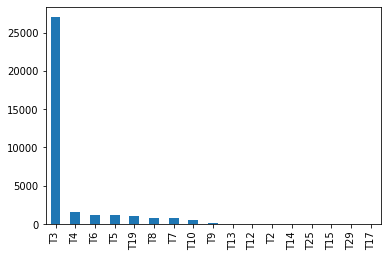

In [32]:
# Look at APPLICATION_TYPE value counts for binning
application_clean.APPLICATION_TYPE.value_counts().plot(kind= 'bar')

In [33]:
application_clean.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

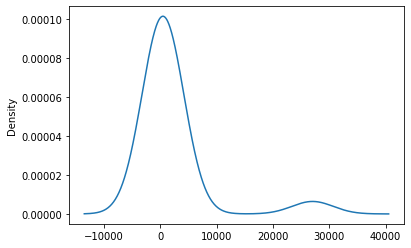

In [34]:
#Density plot- https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/
application_clean.APPLICATION_TYPE.value_counts().plot.density()

In [35]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`-- My cutoff is for aplication types > 500
application_types_to_replace = ['T9','T13','T12','T2', 'T25', 'T14', 'T29', "T15", 'T17']


# Replace in dataframe
for app in application_types_to_replace:
    application_clean['APPLICATION_TYPE'] = application_clean['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_clean['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [36]:
# Look at CLASSIFICATION value counts for binning
application_clean.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C2170        1
C1900        1
C1728        1
C1732        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [37]:
# You may find it helpful to look at CLASSIFICATION value counts >1
# application_clean['CLASSIFICATION'].value_counts().loc[lambda x : x>1]

In [38]:
classification_value = application_df.loc[:, 'CLASSIFICATION'].value_counts()
classification_value

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C2170        1
C1900        1
C1728        1
C1732        1
Name: CLASSIFICATION, Length: 71, dtype: int64

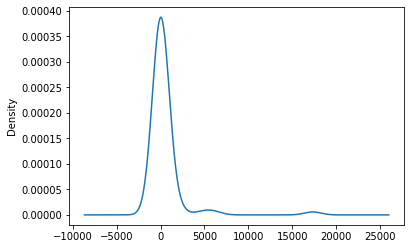

In [39]:
application_clean.CLASSIFICATION.value_counts().plot.density()

In [40]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_value[classification_value<500].index)
# Replace in dataframe
for cls in classifications_to_replace:
    application_clean['CLASSIFICATION'] = application_clean['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_clean['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [41]:
# Convert categorical data to numeric with `pd.get_dummies`
application_clean = pd.get_dummies(application_clean, dtype=float)
application_clean

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
application_clean.dtypes

STATUS                            int64
ASK_AMT                           int64
IS_SUCCESSFUL                     int64
APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T10            float64
APPLICATION_TYPE_T19            float64
APPLICATION_TYPE_T3             float64
APPLICATION_TYPE_T4             float64
APPLICATION_TYPE_T5             float64
APPLICATION_TYPE_T6             float64
APPLICATION_TYPE_T7             float64
APPLICATION_TYPE_T8             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_C2100            float64
CLASSIFICATION_C3000            float64
CLASSIFICATION_C7000            float64
CLASSIFICATION_Other            float64


In [43]:
# Split our preprocessed data into our features and target arrays
y = application_clean.IS_SUCCESSFUL.values
X = application_clean.drop('IS_SUCCESSFUL', axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [44]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
X_train.shape

(25724, 44)

## Compile, Train and Evaluate the Model

# Model 1


In [48]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1= 20
hidden_nodes_layer2= 40
hidden_nodes_layer3= 60

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                900       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                2460      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 4,261
Trainable params: 4,261
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [51]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 3s 3ms/step - loss: 0.5834 - accuracy: 0.7040 - recall: 0.7680 - val_loss: 0.5472 - val_accuracy: 0.7359 - val_recall: 0.7845
Epoch 2/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5574 - accuracy: 0.7262 - recall: 0.7891 - val_loss: 0.5511 - val_accuracy: 0.7380 - val_recall: 0.7576
Epoch 3/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5539 - accuracy: 0.7290 - recall: 0.7901 - val_loss: 0.5457 - val_accuracy: 0.7326 - val_recall: 0.7969
Epoch 4/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5516 - accuracy: 0.7290 - recall: 0.7913 - val_loss: 0.5457 - val_accuracy: 0.7349 - val_recall: 0.7641
Epoch 5/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.7298 - recall: 0.7936 - val_loss: 0.5472 - val_accuracy: 0.7349 - val_recall: 0.7835
Epoch 6/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5495 - accuracy: 0

In [54]:
# Evaluate the model using the test data
model_loss, model_accuracy, Recall = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}, Recall: {Recall}" )

268/268 - 0s - loss: 0.5649 - accuracy: 0.7240 - recall: 0.7726
Loss: 0.5649186372756958, Accuracy: 0.7239649891853333, Recall: 0.7725883722305298


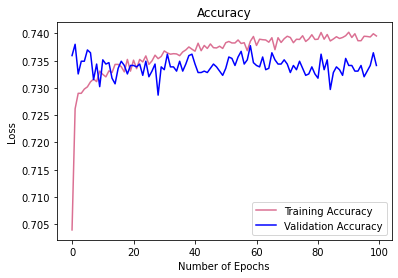

In [60]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], 'palevioletred', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'blue',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend()
plt.show()

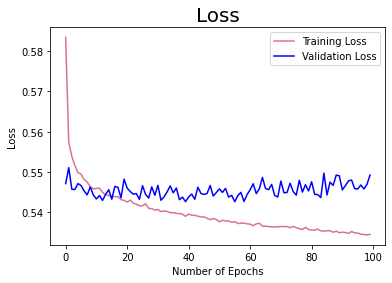

In [61]:
plt.title('Loss',fontsize=20)
plt.plot(fit_model.history['loss'], 'palevioletred', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'blue', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/content/ModelOne.h5')
files.download('/content/ModelOne.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model 2


In [64]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1= 80
hidden_nodes_layer2= 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 80)                3600      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 6,061
Trainable params: 6,061
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [66]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 3s 3ms/step - loss: 0.5746 - accuracy: 0.7175 - recall_1: 0.7770 - val_loss: 0.5511 - val_accuracy: 0.7264 - val_recall_1: 0.8293
Epoch 2/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5577 - accuracy: 0.7266 - recall_1: 0.7915 - val_loss: 0.5465 - val_accuracy: 0.7289 - val_recall_1: 0.7710
Epoch 3/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5542 - accuracy: 0.7282 - recall_1: 0.7910 - val_loss: 0.5458 - val_accuracy: 0.7284 - val_recall_1: 0.7820
Epoch 4/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5523 - accuracy: 0.7295 - recall_1: 0.7949 - val_loss: 0.5495 - val_accuracy: 0.7336 - val_recall_1: 0.7541
Epoch 5/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5503 - accuracy: 0.7311 - recall_1: 0.7909 - val_loss: 0.5504 - val_accuracy: 0.7334 - val_recall_1: 0.7397
Epoch 6/100
684/684 [==============================] - 2s 2ms/step - loss: 

In [67]:
# Evaluate the model using the test data
model_loss, model_accuracy, Recall = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}, Recall: {Recall}" )

268/268 - 0s - loss: 0.5601 - accuracy: 0.7277 - recall_1: 0.7848
Loss: 0.5600684881210327, Accuracy: 0.7276967763900757, Recall: 0.7848101258277893


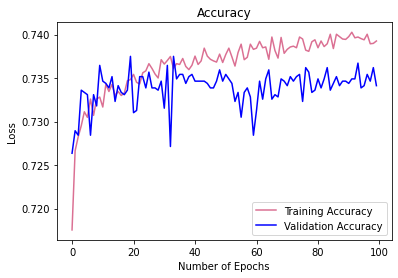

In [68]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], 'palevioletred', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'blue',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend()
plt.show()

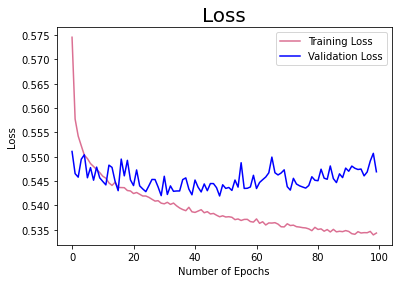

In [69]:
plt.title('Loss',fontsize=20)
plt.plot(fit_model.history['loss'], 'palevioletred', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'blue', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [72]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/content/ModelTwo.h5')
files.download('/content/ModelTwo.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model 3


In [73]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1= 3
hidden_nodes_layer2= 3


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3)                 135       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [75]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 3s 3ms/step - loss: 0.6618 - accuracy: 0.6273 - recall_2: 0.8404 - val_loss: 0.6013 - val_accuracy: 0.7080 - val_recall_2: 0.7402
Epoch 2/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5972 - accuracy: 0.7042 - recall_2: 0.7358 - val_loss: 0.5701 - val_accuracy: 0.7165 - val_recall_2: 0.7302
Epoch 3/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5761 - accuracy: 0.7091 - recall_2: 0.7337 - val_loss: 0.5597 - val_accuracy: 0.7207 - val_recall_2: 0.7297
Epoch 4/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5688 - accuracy: 0.7138 - recall_2: 0.7533 - val_loss: 0.5565 - val_accuracy: 0.7258 - val_recall_2: 0.8228
Epoch 5/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5660 - accuracy: 0.7172 - recall_2: 0.8294 - val_loss: 0.5555 - val_accuracy: 0.7251 - val_recall_2: 0.8263
Epoch 6/100
684/684 [==============================] - 2s 2ms/step - loss: 

In [76]:
# Evaluate the model using the test data
model_loss, model_accuracy, Recall = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}, Recall: {Recall}" )

268/268 - 0s - loss: 0.5559 - accuracy: 0.7283 - recall_2: 0.7767
Loss: 0.5559412837028503, Accuracy: 0.7282798886299133, Recall: 0.7767350673675537


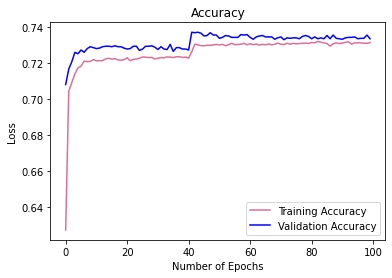

In [77]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], 'palevioletred', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'blue',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend()
plt.show()

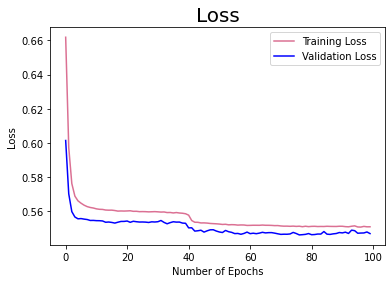

In [78]:
plt.title('Loss',fontsize=20)
plt.plot(fit_model.history['loss'], 'palevioletred', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'blue', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [79]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/content/ModelThree.h5')
files.download('/content/ModelThree.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model 4


In [86]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1= 5
hidden_nodes_layer2= 25
hidden_nodes_layer3= 5


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 5)                 225       
_________________________________________________________________
dense_15 (Dense)             (None, 25)                150       
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 130       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [88]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 3s 3ms/step - loss: 0.6238 - accuracy: 0.6586 - recall_4: 0.7675 - val_loss: 0.5743 - val_accuracy: 0.7207 - val_recall_4: 0.7611
Epoch 2/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5810 - accuracy: 0.7093 - recall_4: 0.7611 - val_loss: 0.5641 - val_accuracy: 0.7230 - val_recall_4: 0.7621
Epoch 3/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5747 - accuracy: 0.7115 - recall_4: 0.7662 - val_loss: 0.5603 - val_accuracy: 0.7248 - val_recall_4: 0.7641
Epoch 4/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5710 - accuracy: 0.7149 - recall_4: 0.7709 - val_loss: 0.5601 - val_accuracy: 0.7251 - val_recall_4: 0.7636
Epoch 5/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5673 - accuracy: 0.7167 - recall_4: 0.7698 - val_loss: 0.5549 - val_accuracy: 0.7274 - val_recall_4: 0.7680
Epoch 6/100
684/684 [==============================] - 2s 2ms/step - loss: 

In [89]:
# Evaluate the model using the test data
model_loss, model_accuracy, Recall = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}, Recall: {Recall}" )

268/268 - 0s - loss: 0.5565 - accuracy: 0.7278 - recall_4: 0.7815
Loss: 0.5564998388290405, Accuracy: 0.7278134226799011, Recall: 0.7815364599227905


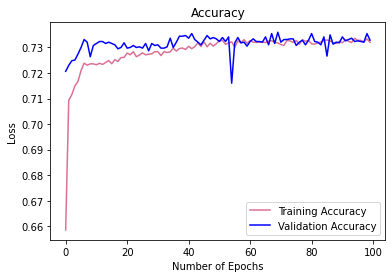

In [90]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], 'palevioletred', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'blue',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend()
plt.show()

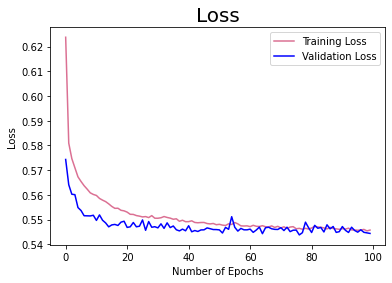

In [91]:
plt.title('Loss',fontsize=20)
plt.plot(fit_model.history['loss'], 'palevioletred', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'blue', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [92]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/content/ModelFour.h5')
files.download('/content/ModelFour.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>